In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring Dataset

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
for root, subdirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning'):
    print(root, ", Number of files: ",len(files))

/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning , Number of files:  0
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH , Number of files:  0
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Sidomukti , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Parang , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Kawung , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok , Number of files:  502
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA , Number of files:  0
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA/Pancawarna , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA/Serat Kayu , Number of files:  500
/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learn

# Creating Data Loader

In [ ]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = filename.split('/')
  label = parts[-2]
  
  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [250, 250])
  return image, label

Text(0.5, 1.0, 'Ceplok')

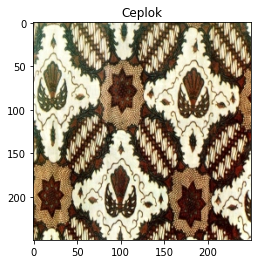

In [ ]:
image, label = parse_image("/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok/1.jpg")
plt.imshow(image)
plt.title(label)

In [ ]:
def load_data(dir, manual_labelling=-1, class_names=None):
    dir_names = os.listdir(dir)
    
    X = []
    y = []
    for i in range(len(dir_names)):
        class_dir = dir + "/" + dir_names[i]
        filenames = os.listdir(class_dir)
        
        images = []
        print("reading", class_dir)
        for file in filenames:
            image, label = parse_image(class_dir + "/" + file)
            X.append(image)
            
            if manual_labelling != -1:
                y.append(manual_labelling)
            else:                
                if label == 'Sidomukti':
                    y.append(0)
                elif label == 'Parang':
                    y.append(1)
                elif label == 'Kawung':
                    y.append(2)
                elif label == 'Ceplok':
                    y.append(3)
                else:
                    print("NO LABEL")

    if manual_labelling != -1:
        return tf.stack(X), tf.stack(y), class_names
    else:
        return tf.stack(X), tf.one_hot(tf.stack(y), len(class_names)), class_names

# X, y, class_names = load_data("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Proyek Akhir Deep Learning/JAWA TENGAH", class_names=['Sidomukti', 'Parang', 'Kawung', 'Ceplok'])   

In [ ]:
"""
def load_data_binary(dir):    
    class_names = ["NON JAWA TENGAH", "JAWA TENGAH"]
    JT_X, JT_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH', 1)
    MD_X, MD_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA', 0)
    PK_X, PK_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/PEKALONGAN', 0)

    X = np.concatenate((X, MD_X, PK_X), axis=0)
    y = np.concatenate((y, MD_y, PK_y), axis=0)
    
    return X, y, class_names

X, y, class_names = load_data_binary("/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning")
"""

'\ndef load_data_binary(dir):    \n    class_names = ["NON JAWA TENGAH", "JAWA TENGAH"]\n    JT_X, JT_y, _ = load_data(\'/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH\', 1)\n    MD_X, MD_y, _ = load_data(\'/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA\', 0)\n    PK_X, PK_y, _ = load_data(\'/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/PEKALONGAN\', 0)\n\n    X = np.concatenate((X, MD_X, PK_X), axis=0)\n    y = np.concatenate((y, MD_y, PK_y), axis=0)\n    \n    return X, y, class_names\n\nX, y, class_names = load_data_binary("/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning")\n'

In [ ]:
def load_data_multiclass_misc():    
    no_X, no_y, class_names = load_data("/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH", class_names=['Sidomukti', 'Parang', 'Kawung', 'Ceplok', 'Lain-Lain'])
    MD_X, MD_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA', 4)
    PK_X, PK_y, _ = load_data('/content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/PEKALONGAN', 4)
    MD_y = np.repeat([[0, 0, 0, 0, 1]], len(MD_y), axis=0)
    PK_y = np.repeat([[0, 0, 0, 0, 1]], len(PK_y), axis=0)

    print(no_y.shape)
    print(MD_y.shape)

    X = np.concatenate((no_X, MD_X, PK_X), axis=0)
    y = np.concatenate((no_y, MD_y, PK_y), axis=0)
    
    return X, y, class_names
X, y, class_names = load_data_multiclass_misc()

reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Sidomukti
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Parang
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Kawung
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/JAWA TENGAH/Ceplok
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA/Pancawarna
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA/Serat Kayu
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/MADURA/Kacangan
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/PEKALONGAN/Terang Bulan
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/PEKALONGAN/Tujuh Rupa
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir Deep Learning/PEKALONGAN/Jlamprang
reading /content/drive/MyDrive/Colab Notebooks/Proyek Akhir De

In [ ]:
X.shape, y.shape, class_names

((5756, 250, 250, 3),
 (5756, 5),
 ['Sidomukti', 'Parang', 'Kawung', 'Ceplok', 'Lain-Lain'])

# Train Test Splitting


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X, y = None, None

len(X_train), len(X_test), len(y_train), len(y_test)

(4604, 1152, 4604, 1152)

# ResNet12 Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [ ]:
"""
model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same", input_shape=(250, 250, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides=(2,2)))

# Resnet Block
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(BatchNormalization())
          
# Resnet Block
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(BatchNormalization())

# Resnet Block
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(BatchNormalization())

# Resnet Block
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(BatchNormalization())

# Resnet Block
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2), padding = "Same"))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
"""

'\nmodel = Sequential()\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same", input_shape=(250, 250, 3)))\nmodel.add(MaxPooling2D(pool_size = (2, 2), strides=(2,2)))\n\n# Resnet Block\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(BatchNormalization())\n          \n# Resnet Block\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(BatchNormalization())\n\n# Resnet Block\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(BatchNormalization())\n\n# Resnet Block\nmodel.add(Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "Same"))\nmodel.add(Conv2D(64, kernel_size = 

In [ ]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.LeakyReLU()(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.LeakyReLU()(x)
    # Layer 3
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.LeakyReLU()(x)
    # Skipped Connection
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), padding = 'same')(x_skip)
    x_skip = tf.keras.layers.BatchNormalization(axis=3)(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2)(x)
    return x

In [ ]:
def resnet12(input_shape=(250, 250, 3), output_shape=1):
    input = tf.keras.layers.Input(shape=input_shape)
    x = identity_block(input, 64)
    x = identity_block(x, 128)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = identity_block(x, 256)
    x = identity_block(x, 512)
    x = tf.keras.layers.GlobalAvgPool2D()(x)
    output = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.Model(input, output)

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

In [ ]:
model = resnet12()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 250, 250, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 250, 250, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

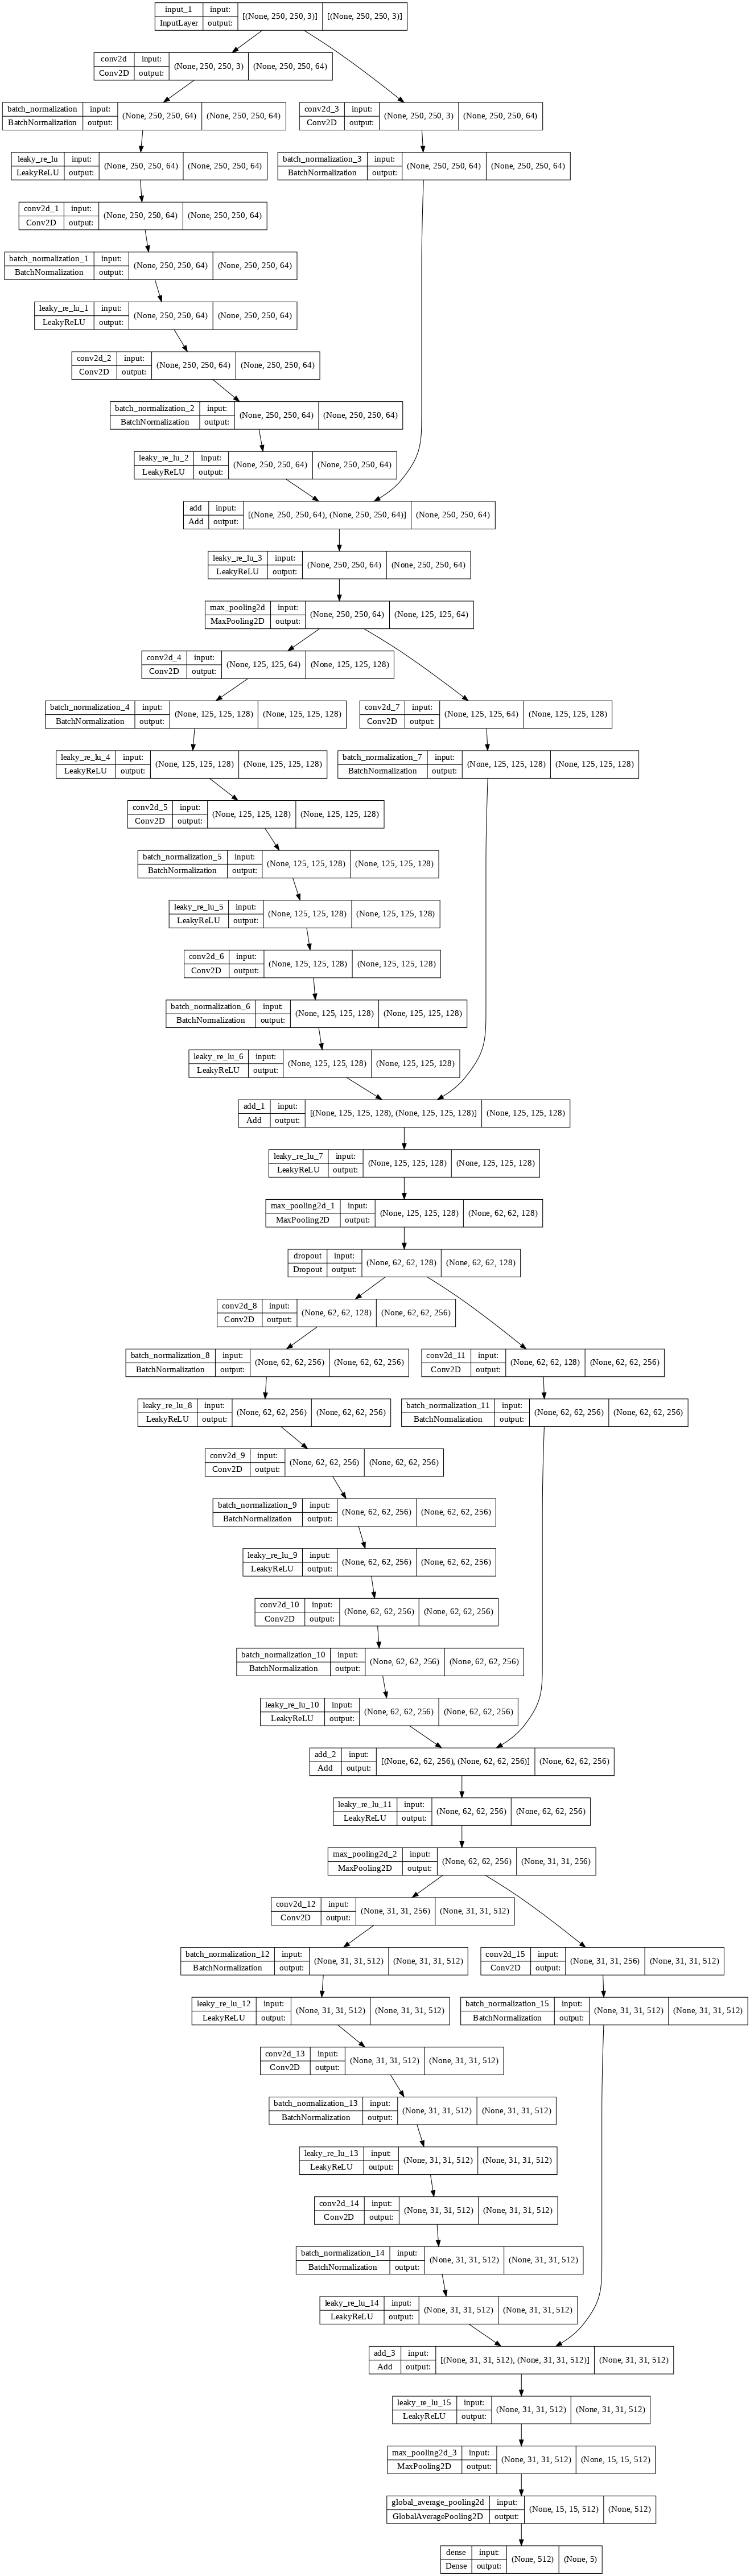

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=76, to_file='model_v1.png')

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/30
288/288 [==============================] - 254s 824ms/step - loss: 1.2271 - accuracy: 0.6438 - val_loss: 1.5643 - val_accuracy: 0.4566
Epoch 2/30
288/288 [==============================] - 236s 820ms/step - loss: 0.9712 - accuracy: 0.6753 - val_loss: 1.0798 - val_accuracy: 0.6641
Epoch 3/30
288/288 [==============================] - 236s 819ms/step - loss: 0.9395 - accuracy: 0.6883 - val_loss: 1.0710 - val_accuracy: 0.6276
Epoch 4/30
288/288 [==============================] - 230s 800ms/step - loss: 0.9016 - accuracy: 0.7044 - val_loss: 1.2760 - val_accuracy: 0.5608
Epoch 5/30
288/288 [==============================] - 231s 801ms/step - loss: 0.8441 - accuracy: 0.7133 - val_loss: 0.9933 - val_accuracy: 0.6771
Epoch 6/30
288/288 [==============================] - 235s 816ms/step - loss: 0.8246 - accuracy: 0.7200 - val_loss: 1.0038 - val_accuracy: 0.6649
Epoch 7/30
288/288 [==============================] - 230s 800ms/step - loss: 0.7715 - accuracy: 0.7372 - val_loss: 0.8981 -

In [ ]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs

    
    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [ ]:
np.save('resnet12_edited_history_1.npy', history.history)

In [ ]:
history1=np.load('resnet12_edited_history_1.npy',allow_pickle='TRUE').item()

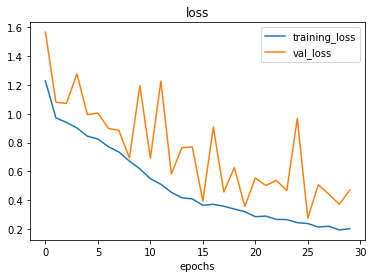

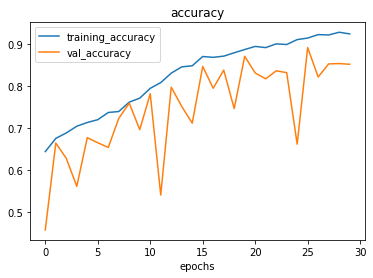

In [ ]:
plot_loss_curves(history)

In [ ]:
model.save(r'resnet12_edited_model_1.h5')

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('resnet12_edited_model_1.h5')

# Test the Algorithm

In [ ]:
!wget "https://s2.bukalapak.com/bukalapak-kontenz-production/content_attachments/75692/original/motif_batik_sidomukti_6.png" -O "tes_sidomukti1.png"

In [ ]:
image = tf.io.read_file("tes_sidomukti1.png")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = model.predict(tf.expand_dims(image, axis=0))
preds_prob

In [ ]:
preds = tf.argmax(tf.squeeze(preds_prob))
preds

In [ ]:
!wget "https://img.freepik.com/free-vector/javanese-batik-kawung-pattern_67419-11.jpg?w=2000" -O "tes_kawung1.jpg"

In [ ]:
image = tf.io.read_file("tes_kawung1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = model.predict(tf.expand_dims(image, axis=0))
preds_prob

In [ ]:
preds = tf.argmax(tf.squeeze(preds_prob))
preds

In [ ]:
!wget "https://www.batikjibb.com/wp-content/uploads/2021/08/08batik.jpg" -O "tes_parang1.jpg"

In [ ]:
image = tf.io.read_file("tes_parang1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = model.predict(tf.expand_dims(image, axis=0))
preds_prob

In [ ]:
preds = tf.argmax(tf.squeeze(preds_prob))
preds

In [ ]:
!wget "https://www.semarangpos.com/files/2020/07/29batik.jpg" -O "tes_ceplok1.jpg"

In [ ]:
image = tf.io.read_file("tes_ceplok1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = model.predict(tf.expand_dims(image, axis=0))
preds_prob

In [ ]:
class_names

In [ ]:
!wget "https://s0.bukalapak.com/img/07161374841/large/Termurah_Batik_Kacang_Warna_Hijau_Lengan_Pendek.jpg" -O "tes_kacangan_madura1.jpg"

In [ ]:
image = tf.io.read_file("tes_kacangan_madura1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = model.predict(tf.expand_dims(image, axis=0))
preds_prob

In [ ]:
!wget "https://cdn-cas.orami.co.id/parenting/images/batik-liong-pekalongan.width-800.jpg" -O "tes_liong_pekalongan1.jpg"

In [ ]:
image = tf.io.read_file("tes_liong_pekalongan1.jpg")
image = tf.io.decode_jpeg(image)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [250, 250])

plt.imshow(image)

In [ ]:
preds_prob = model.predict(tf.expand_dims(image, axis=0))
preds_prob